
    # Predicting PM2.5 Levels Using Random Forest
    
    This notebook demonstrates the process of building a machine learning model to predict PM2.5 levels for the next 24 hours. 
    We use a dataset that contains hourly measurements of various air pollutants, including PM2.5. The model of choice is a Random Forest regressor.
    
    The steps are as follows:
    1. Data Loading and Preprocessing
    2. Feature Engineering for Time Series
    3. Data Splitting into Training and Test Sets
    4. Model Building and Training
    5. Model Evaluation
    

In [1]:

    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()  # Set seaborn as the default style
    import pickle
    

In [2]:

    import pandas as pd

    # Load the dataset
    file_path = 'G:\Mon Drive\Hands-on data with start-up cases\Final Project\Paris Air Quality\App_ds_2021_halles.csv'  # Replace with your file path
    data = pd.read_csv(file_path)

    # Convert 'Date de début' to datetime format and check for missing values
    data['Date de début'] = pd.to_datetime(data['Date de début'], format='%Y/%m/%d %H:%M:%S')
    missing_pm25 = data['PM2.5'].isnull().sum()

    # Filling missing values using forward fill method
    data_filled = data.ffill()
    

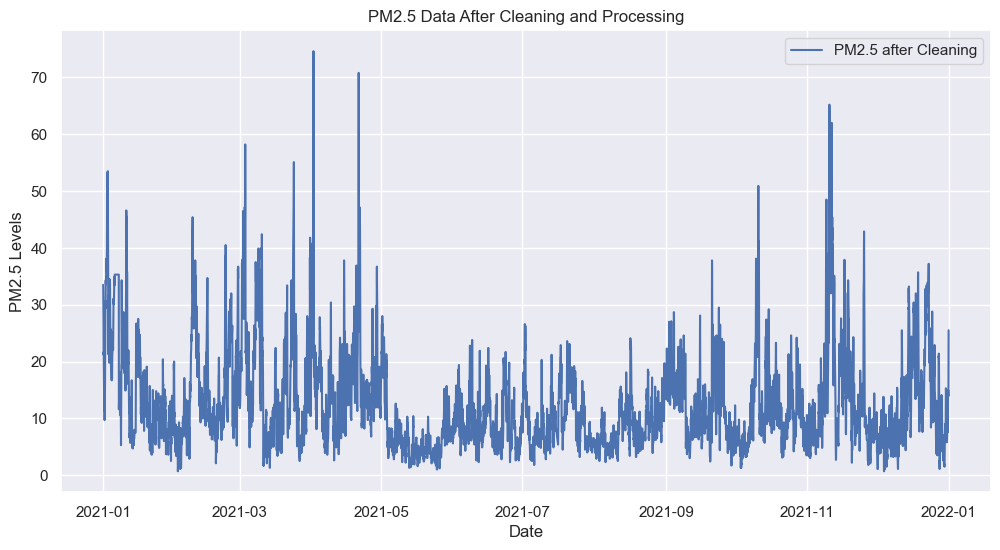

In [3]:

    # Plotting the PM2.5 data after cleaning and processing
    plt.figure(figsize=(12, 6))
    plt.plot(data_filled['Date de début'], data_filled['PM2.5'], label='PM2.5 after Cleaning')
    plt.title('PM2.5 Data After Cleaning and Processing')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Levels')
    plt.legend()
    plt.show()
    

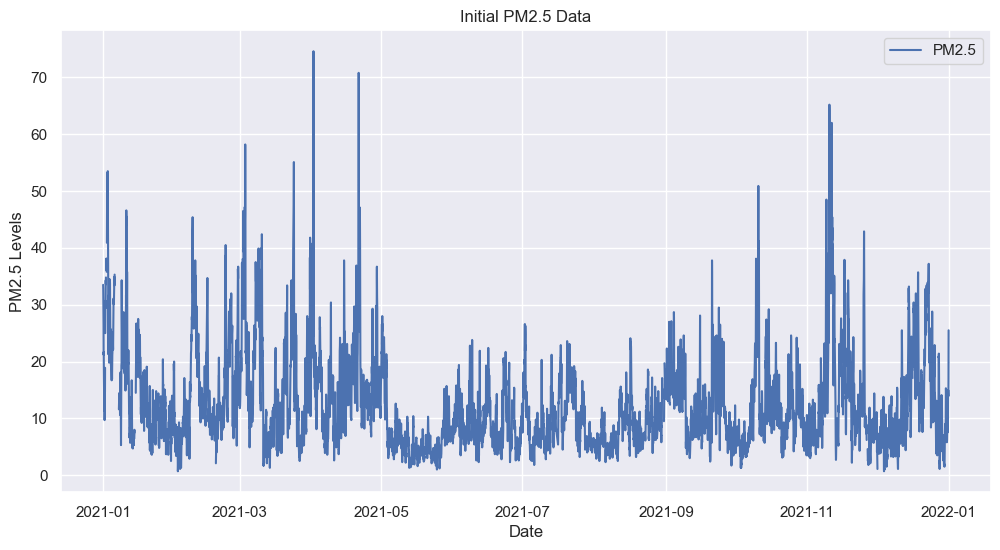

In [4]:

    # Plotting the initial PM2.5 data
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date de début'], data['PM2.5'], label='PM2.5')
    plt.title('Initial PM2.5 Data')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Levels')
    plt.legend()
    plt.show()
    

In [5]:

    # Creating lagged features for PM2.5 for the previous 6 hours
    for lag in range(1, 7):
        data_filled[f'PM2.5_lag_{lag}'] = data_filled['PM2.5'].shift(lag)

    # Filling the initial NaN values due to lagging with forward fill
    data_filled = data_filled.ffill()
    

In [6]:

    from sklearn.model_selection import train_test_split

    # Splitting the data into training and test sets
    total_rows = data_filled.shape[0]
    test_rows = 24  # for the last 24 hours

    train_data = data_filled.iloc[:total_rows - test_rows]
    test_data = data_filled.iloc[total_rows - test_rows:]
    

In [7]:

    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np

    # Selecting features and target variable
    X_train = train_data.filter(regex='PM2.5_lag').values
    y_train = train_data['PM2.5'].values

    X_test = test_data.filter(regex='PM2.5_lag').values
    y_test = test_data['PM2.5'].values

    # Remove rows with NaN values from the training set
    nan_indices_train = np.where(np.isnan(X_train).any(axis=1))[0]
    X_train = np.delete(X_train, nan_indices_train, axis=0)
    y_train = np.delete(y_train, nan_indices_train)

    # Creating and training the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    

RandomForestRegressor(random_state=42)

In [8]:

    # Making predictions and evaluating the model
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae, rmse  # Displaying the evaluation metrics
    

(1.6366666666666667, 2.5083181948601885)

In [15]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape*100, "%")

MAPE: 14.116440029385293 %
